Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [5]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [7]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
df.shape

(440, 9)

In [9]:
df_drop = df.drop(df.columns[[0,1,2]], axis=1)

In [10]:
df_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [11]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [12]:
df['Total_Spending'] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [13]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Channel Total Spending'}, xlabel='Channel', ylabel='Total_Spending'>

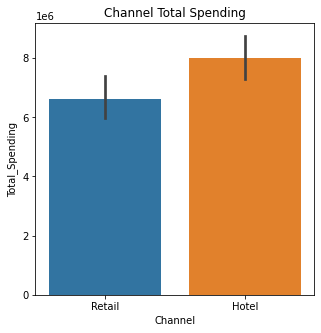

In [14]:
plt.figure(figsize=(5,5))
plt.title('Channel Total Spending')
sns.barplot(df['Channel'],df['Total_Spending'],estimator=np.sum)

C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Region Total Spending'}, xlabel='Region', ylabel='Total_Spending'>

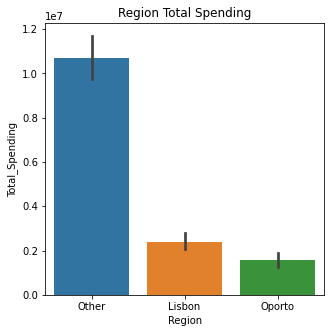

In [15]:
plt.figure(figsize=(5,5))
plt.title('Region Total Spending')
sns.barplot(df['Region'],df['Total_Spending'],estimator=np.sum)

In [16]:
regiondf = df.groupby('Region')['Total_Spending'].sum()
regiondf

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spending, dtype: int64

In [17]:
channeldf = df.groupby('Channel')['Total_Spending'].sum()
channeldf

Channel
Hotel     7999569
Retail    6619931
Name: Total_Spending, dtype: int64

Highest spend in the Region is from Others and lowest spend in the region is from Oporto
Highest spend in the Channel is from Hotel and lowest spend in the Channel is from Retail.

In [18]:
df_channel = df.drop(columns=['Region'])
channel_mean = df_channel.groupby('Channel').mean()
channel_mean.round(2)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Channel,,,,,,,,
Hotel,238.37,13475.56,3451.72,3962.14,3748.25,790.56,1415.96,26844.19
Retail,183.00,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44,46619.23


In Channel "Hotel" Average Highest Spending in Fresh items and Lowest Spending in Detergents_Paper.

In Channel "Retail" Average Highest Spending in Grocery items and Lowest Spending in Frozen items.

In [19]:
df_region = df.drop(columns=['Channel'])
region_mean = df_region.groupby('Region').mean()
region_mean.round(2)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spending
Region,,,,,,,,
Lisbon,235.00,11101.73,5486.42,7403.08,3000.34,2651.12,1354.9,30997.57
Oporto,317.00,9887.68,5088.17,9218.60,4045.36,3687.47,1159.7,33086.98
Other,202.61,12533.47,5977.09,7896.36,2944.59,2817.75,1620.6,33789.87


In Region "Lisbon" Average Highest Spending in Fresh and Lowest in Delicatessen items.

In Region "Oporto" Average Highest Spending in Fresh and Lowest in Delicatessen items.

In Region "Other" Average Highest Spending in Fresh and Lowest in Delicatessen items.

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [20]:
df_1 = df.drop('Buyer/Spender',axis=1,inplace=True)
df_1 = df.drop('Total_Spending',axis=1)
df_1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [21]:
df_1_channel = df_1.drop(columns=['Region'])
channel_sum = df_1_channel.groupby('Channel').sum()
channel_sum.reset_index(inplace=True)
channel_sum

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,4015717,1028614,1180717,1116979,235587,421955
1,Retail,1264414,1521743,2317845,234671,1032270,248988


Text(0.5, 1.0, 'Bar plot showing amount spent on different varieties in Channel')

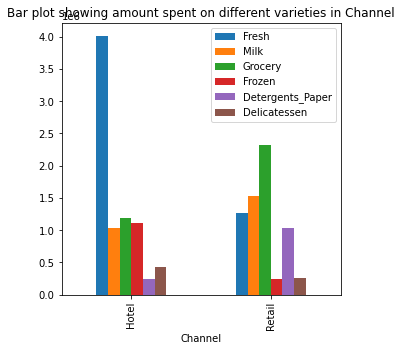

In [24]:
channel_sum.plot(x='Channel',kind='bar',stacked=False,figsize=(5,5))
plt.title('Bar plot showing amount spent on different varieties in Channel')

Text(0.5, 1.0, 'Bar plot showing amount spent on different varieties in Channel')

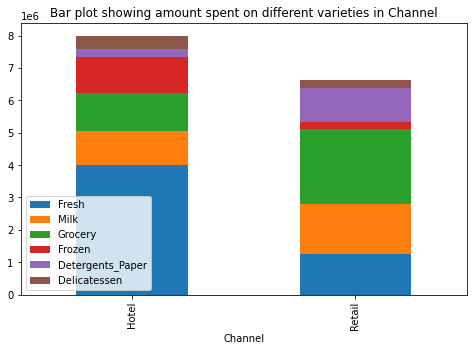

In [27]:
channel_sum.plot(x='Channel',kind='bar',stacked=True,figsize=(8,5))
plt.title('Bar plot showing amount spent on different varieties in Channel')

In [28]:
df_1_region = df_1.drop(columns = ['Channel'])
region_sum = df_1_region.groupby('Region').sum()
region_sum.reset_index(inplace=True)
region_sum

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,854833,422454,570037,231026,204136,104327
1,Oporto,464721,239144,433274,190132,173311,54506
2,Other,3960577,1888759,2495251,930492,890410,512110


Text(0.5, 1.0, 'Bar plot showing amount spent on different varieties in Region')

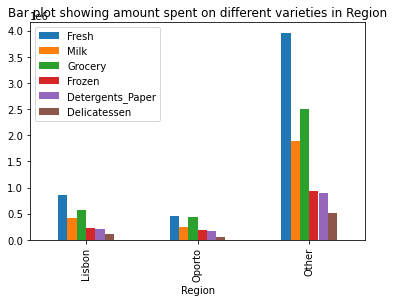

In [29]:
region_sum.plot(x='Region',kind='bar',stacked=False)
plt.title('Bar plot showing amount spent on different varieties in Region')

Text(0.5, 1.0, 'Bar plot showing amount spent on different varieties in Region')

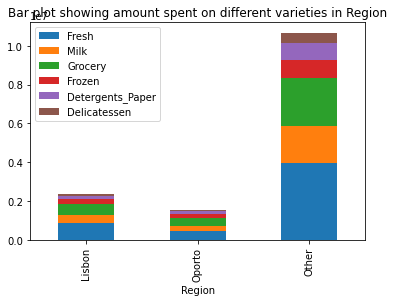

In [30]:
region_sum.plot(x='Region',kind='bar',stacked=True)
plt.title('Bar plot showing amount spent on different varieties in Region')

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?



Based on Standard deviation:

In [33]:
df_drop.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Fresh item have highest Standard deviation So that is inconsistent.

Delicatessen item have smallest Standard deviation, So that is consistent.

In [92]:
df_var=df_1.std()/df_1.mean()
df_var

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

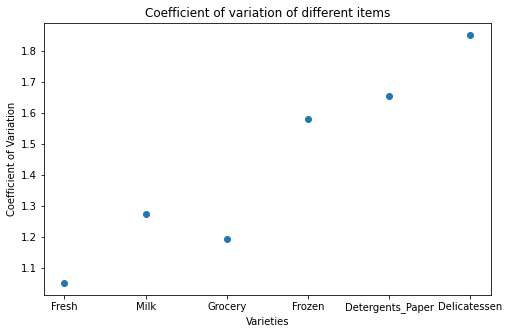

In [101]:
plt.figure(figsize=(8,5))
plt.xlabel('Varieties')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of variation of different items')
plt.scatter(x=df_var.index, y=df_var.values)
plt.show

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.



Text(0.5, 1.0, 'Boxplot showing outliers in different varities of items')

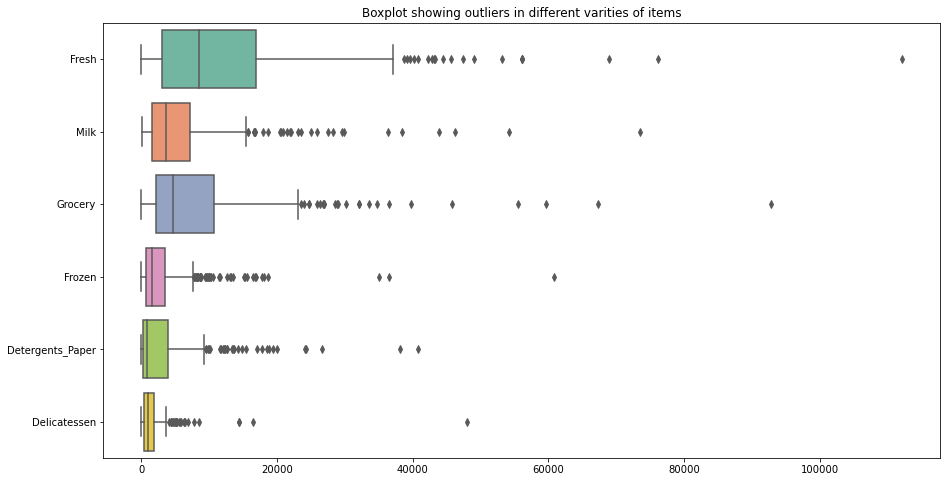

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_drop, orient="h", palette="Set2")
plt.title('Boxplot showing outliers in different varities of items')

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective



On the basis of the analysis done, it is found that a lot of revenue is got from ‘Fresh’. Therefore we can stock up more on fresh items to generate more revenue. Detergents_Paper and Delicatessen gives the least revenue. Therefore that has to be stocked less. However the business can be improved in these items by giving offers, discounts or by advertising the uses, advantages of these items. The business should be improved such that the amount spent in all regions should be almost equal. By improving business across all regions, we can generate more revenue. There are inconsistencies in spending of different items (by calculating Coefficient of Variation), which has to be minimized. 	

In [ ]:
Problem 1

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('Wholesale+Customers+Data.csv')

df.head()

df.info()

df.describe()

df.shape

df_drop = df.drop(df.columns[[0,1,2]], axis=1)

df_drop.head()

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

df_drop.describe().T

df['Total_Spending'] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

df

plt.figure(figsize=(5,5))
plt.title('Channel Total Spending')
sns.barplot(df['Channel'],df['Total_Spending'],estimator=np.sum)

plt.figure(figsize=(5,5))
plt.title('Region Total Spending')
sns.barplot(df['Region'],df['Total_Spending'],estimator=np.sum)

regiondf = df.groupby('Region')['Total_Spending'].sum()
regiondf

channeldf = df.groupby('Channel')['Total_Spending'].sum()
channeldf

Highest spend in the Region is from Others and lowest spend in the region is from Oporto
Highest spend in the Channel is from Hotel and lowest spend in the Channel is from Retail.

df_channel = df.drop(columns=['Region'])
channel_mean = df_channel.groupby('Channel').mean()
channel_mean.round(2)

In Channel "Hotel" Average Highest Spending in Fresh items and Lowest Spending in Detergents_Paper.

In Channel "Retail" Average Highest Spending in Grocery items and Lowest Spending in Frozen items.

df_region = df.drop(columns=['Channel'])
region_mean = df_region.groupby('Region').mean()
region_mean.round(2)

In Region "Lisbon" Average Highest Spending in Fresh and Lowest in Delicatessen items.

In Region "Oporto" Average Highest Spending in Fresh and Lowest in Delicatessen items.

In Region "Other" Average Highest Spending in Fresh and Lowest in Delicatessen items.

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

df_1 = df.drop('Buyer/Spender',axis=1,inplace=True)
df_1 = df.drop('Total_Spending',axis=1)
df_1

df_1_channel = df_1.drop(columns=['Region'])
channel_sum = df_1_channel.groupby('Channel').sum()
channel_sum.reset_index(inplace=True)
channel_sum

channel_sum.plot(x='Channel',kind='bar',stacked=False,figsize=(5,5))
plt.title('Bar plot showing amount spent on different varieties in Channel')

channel_sum.plot(x='Channel',kind='bar',stacked=True,figsize=(8,5))
plt.title('Bar plot showing amount spent on different varieties in Channel')

df_1_region = df_1.drop(columns = ['Channel'])
region_sum = df_1_region.groupby('Region').sum()
region_sum.reset_index(inplace=True)
region_sum

region_sum.plot(x='Region',kind='bar',stacked=False)
plt.title('Bar plot showing amount spent on different varieties in Region')

region_sum.plot(x='Region',kind='bar',stacked=True)
plt.title('Bar plot showing amount spent on different varieties in Region')

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?



Based on Standard deviation:

df_drop.describe().T

Fresh item have highest Standard deviation So that is inconsistent.

Delicatessen item have smallest Standard deviation, So that is consistent.

df_var=df_1.std()/df_1.mean()
df_var

plt.figure(figsize=(8,5))
plt.xlabel('Varieties')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of variation of different items')
plt.scatter(x=df_var.index, y=df_var.values)
plt.show

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.



plt.figure(figsize=(15,8))
sns.boxplot(data=df_drop, orient="h", palette="Set2")
plt.title('Boxplot showing outliers in different varities of items')

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective



On the basis of the analysis done, it is found that a lot of revenue is got from ‘Fresh’. Therefore we can stock up more on fresh items to generate more revenue. Detergents_Paper and Delicatessen gives the least revenue. Therefore that has to be stocked less. However the business can be improved in these items by giving offers, discounts or by advertising the uses, advantages of these items. The business should be improved such that the amount spent in all regions should be almost equal. By improving business across all regions, we can generate more revenue. There are inconsistencies in spending of different items (by calculating Coefficient of Variation), which has to be minimized. 	